<a href="https://colab.research.google.com/github/Sunnyttc1992/anomaly_detection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import skew as sk

In [2]:
# Download latest version
path = kagglehub.dataset_download("muhammadwaqas023/predictive-maintenance-oil-and-gas-pipeline-data")

print("Path to dataset files:", path)

100%|██████████| 18.7k/18.7k [00:00<00:00, 25.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muhammadwaqas023/predictive-maintenance-oil-and-gas-pipeline-data/versions/1


In [3]:
import pandas as pd
# Assuming 'path' is the directory containing the CSV files
# We'll look for a CSV file and read the first one found
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(file_path)
    print("DataFrame created from", csv_files[0])
    print(df.head())
else:
    print("No CSV files found in the downloaded dataset directory.")
    df = None # Or create an empty DataFrame if needed

DataFrame created from market_pipe_thickness_loss_dataset.csv
   Pipe_Size_mm  Thickness_mm      Material              Grade  \
0           800         15.48  Carbon Steel  ASTM A333 Grade 6   
1           800         22.00           PVC  ASTM A106 Grade B   
2           400         12.05  Carbon Steel         API 5L X52   
3          1500         38.72  Carbon Steel         API 5L X42   
4          1500         24.32          HDPE         API 5L X65   

   Max_Pressure_psi  Temperature_C  Corrosion_Impact_Percent  \
0               300           84.9                     16.04   
1               150           14.1                      7.38   
2              2500            0.6                      2.12   
3              1500           52.7                      5.58   
4              1500           11.7                     12.29   

   Thickness_Loss_mm  Material_Loss_Percent  Time_Years Condition  
0               4.91                  31.72           2  Moderate  
1               7.32

In [4]:
df

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical
...,...,...,...,...,...,...,...,...,...,...,...
995,1500,34.85,PVC,API 5L X65,150,96.2,5.16,9.98,28.64,15,Critical
996,800,12.53,Carbon Steel,ASTM A333 Grade 6,150,6.5,6.54,1.07,8.54,23,Normal
997,100,6.77,PVC,ASTM A106 Grade B,600,44.7,15.90,6.22,91.88,15,Critical
998,300,15.05,HDPE,API 5L X42,600,37.9,6.60,5.39,35.81,12,Critical


In [5]:
df.describe()

,Pipe_Size_mm,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,522.000000,16.073530,1004.100000,42.595600,9.745990,4.886300,46.747560,12.961000
std,443.703587,10.548358,812.843099,41.127071,5.817492,2.901123,46.602553,7.135993
min,50.000000,3.000000,150.000000,-50.000000,0.000000,0.010000,0.080000,1.000000
25%,150.000000,7.357500,300.000000,13.400000,4.492500,2.365000,15.665000,7.000000
50%,300.000000,12.930000,900.000000,41.200000,9.720000,4.915000,31.660000,13.000000
75%,800.000000,23.027500,1500.000000,69.150000,14.832500,7.432500,61.035000,19.000000
max,1500.000000,49.530000,2500.000000,149.700000,20.000000,9.990000,318.750000,25.000000


In [9]:
df.isnull().sum()

,0
Pipe_Size_mm,0
Thickness_mm,0
Material,0
Grade,0
Max_Pressure_psi,0
Temperature_C,0
Corrosion_Impact_Percent,0
Thickness_Loss_mm,0
Material_Loss_Percent,0
Time_Years,0


In [30]:
df.dtypes

,0
Pipe_Size_mm,int64
Thickness_mm,float64
Material,object
Grade,object
Max_Pressure_psi,int64
Temperature_C,float64
Corrosion_Impact_Percent,float64
Thickness_Loss_mm,float64
Material_Loss_Percent,float64
Time_Years,int64


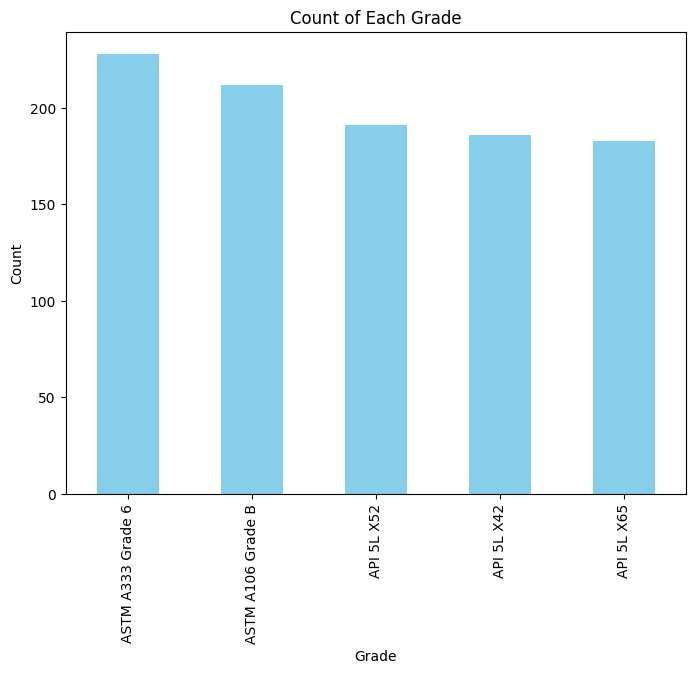

In [23]:
# Count each Grade of pipelines
# Count occurrence of each grade
grade_count = df['Grade'].value_counts()
# Plot
plt.figure(figsize=(8, 6))
grade_count.plot(kind='bar', color='skyblue')
plt.title('Count of Each Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

## **Measure of tendency**

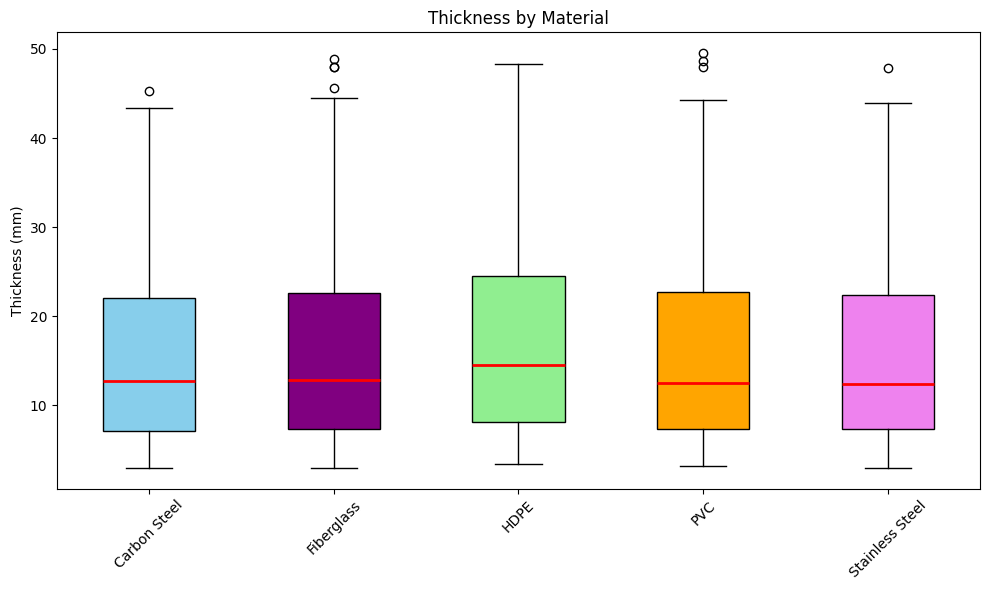

In [15]:
# Group data
groups = df.groupby('Material')['Thickness_mm'].apply(list)

# Create box plot
fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot(groups, patch_artist=True)

# Custom colors
colors = ['skyblue', 'purple', 'lightgreen', 'orange', 'violet']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set median lines to red
for median in box['medians']:
    median.set_color('red')
    median.set_linewidth(2)

# Axis settings
ax.set_xticklabels(groups.index, rotation=45)
ax.set_title('Thickness by Material')
ax.set_ylabel('Thickness (mm)')
plt.tight_layout()
plt.show()


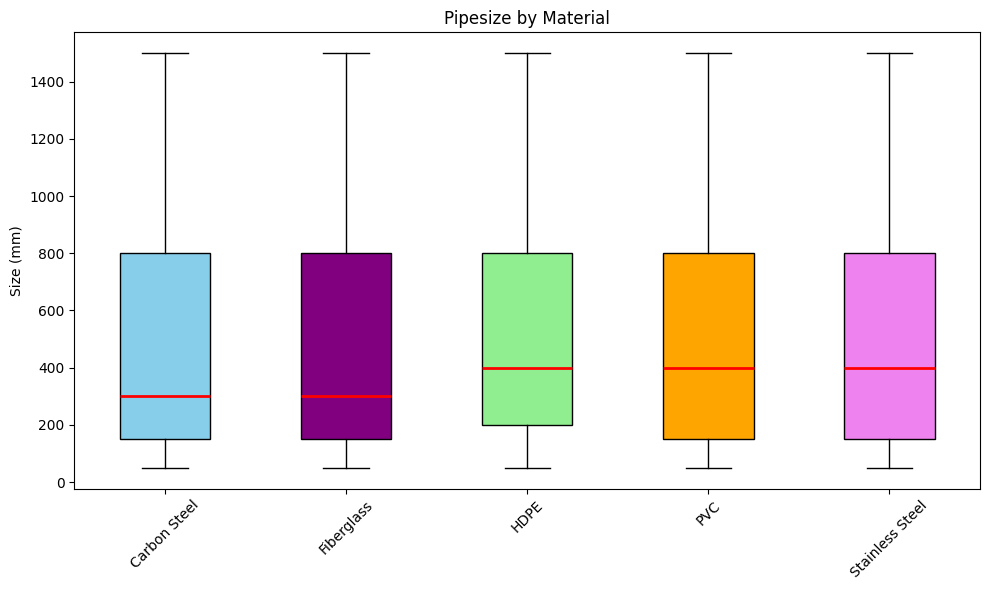

In [17]:
# Group data
groups = df.groupby('Material')['Pipe_Size_mm'].apply(list)

# Create box plot
fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot(groups, patch_artist=True)

# Custom colors
colors = ['skyblue', 'purple', 'lightgreen', 'orange', 'violet']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set median lines to red
for median in box['medians']:
    median.set_color('red')
    median.set_linewidth(2)

# Axis settings
ax.set_xticklabels(groups.index, rotation=45)
ax.set_title('Pipesize by Material')
ax.set_ylabel('Size (mm)')
plt.tight_layout()
plt.show()


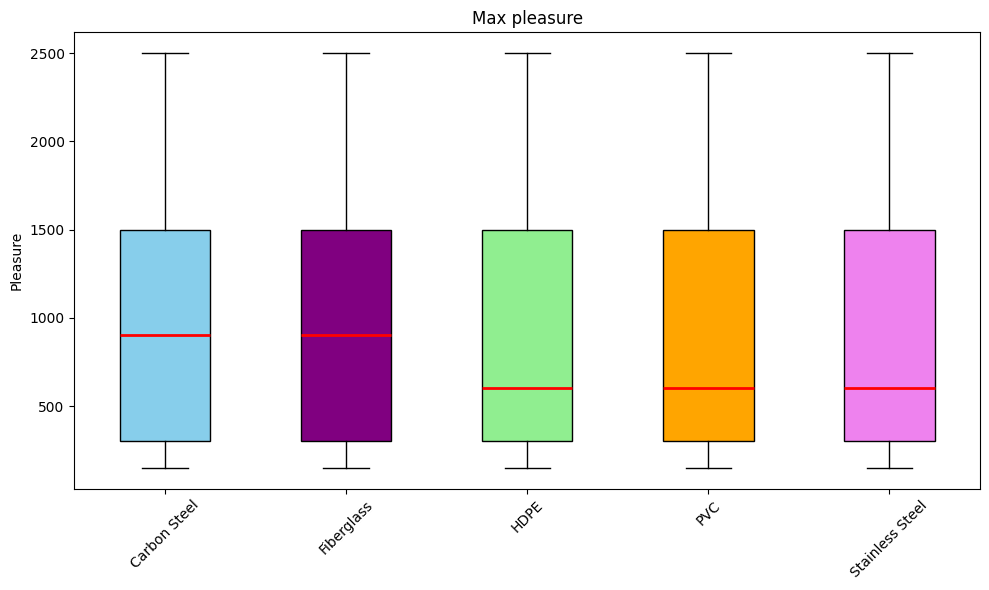

In [18]:
# Group data
groups = df.groupby('Material')['Max_Pressure_psi'].apply(list)

# Create box plot
fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot(groups, patch_artist=True)

# Custom colors
colors = ['skyblue', 'purple', 'lightgreen', 'orange', 'violet']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set median lines to red
for median in box['medians']:
    median.set_color('red')
    median.set_linewidth(2)

# Axis settings
ax.set_xticklabels(groups.index, rotation=45)
ax.set_title('Max pleasure')
ax.set_ylabel('Pleasure')
plt.tight_layout()
plt.show()


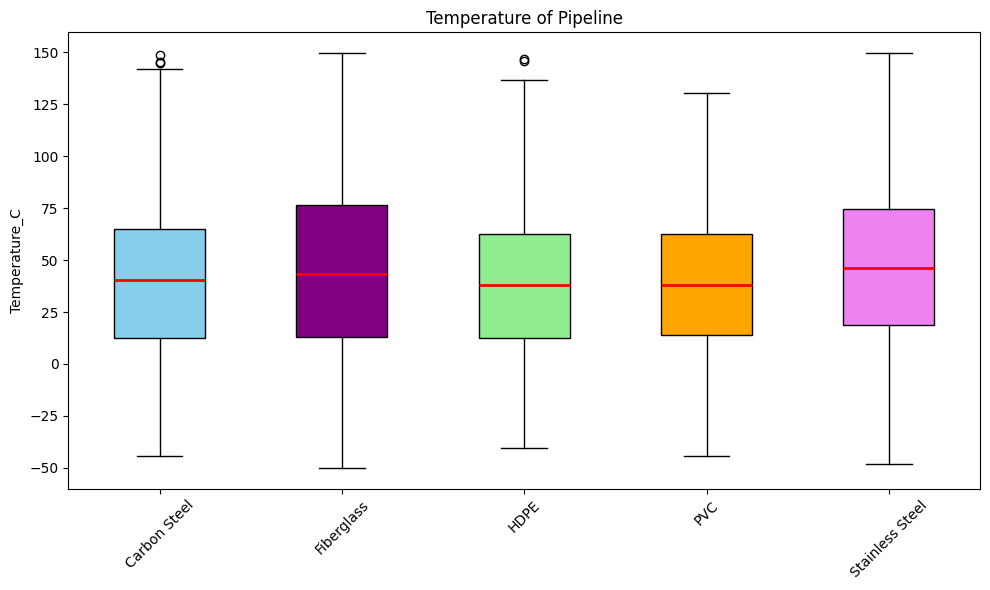

In [19]:
# Group data
groups = df.groupby('Material')['Temperature_C'].apply(list)

# Create box plot
fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot(groups, patch_artist=True)

# Custom colors
colors = ['skyblue', 'purple', 'lightgreen', 'orange', 'violet']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set median lines to red
for median in box['medians']:
    median.set_color('red')
    median.set_linewidth(2)

# Axis settings
ax.set_xticklabels(groups.index, rotation=45)
ax.set_title('Temperature of Pipeline')
ax.set_ylabel('Temperature_C')
plt.tight_layout()
plt.show()

Investigating corriration between variable

<Axes: >

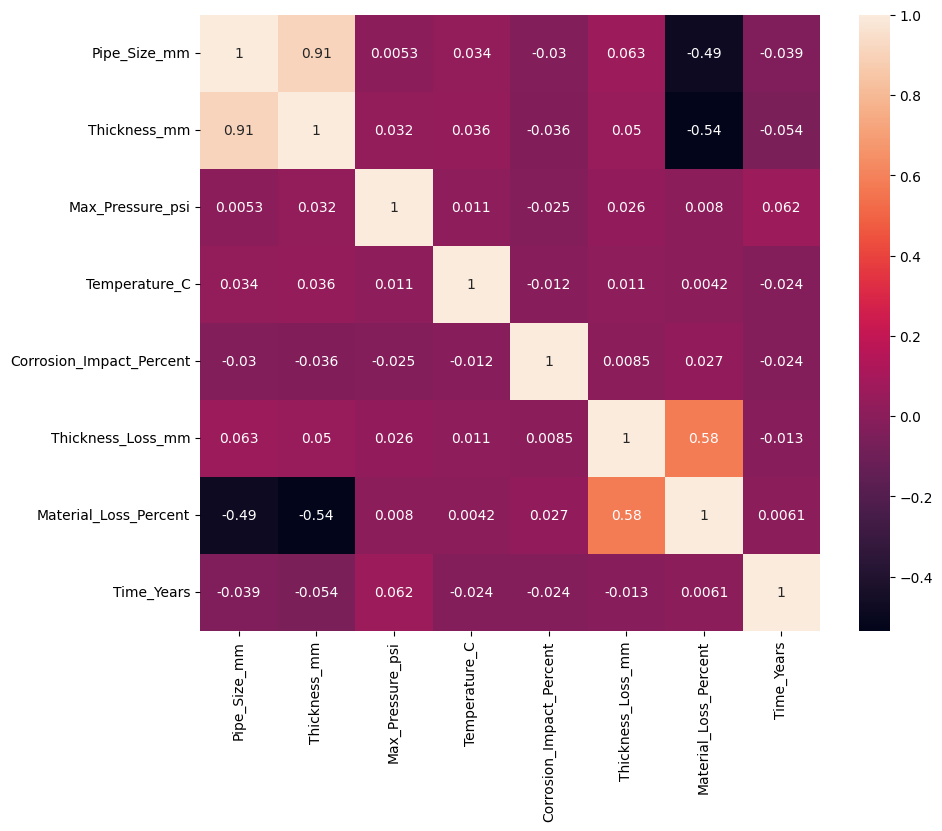

In [21]:
# filter only numeric data
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)

## **Check Skewness of the dataset**

In [26]:
# Compute skewness
skewness = numeric_df.apply(sk).sort_values(ascending=False)
print(skewness)

Material_Loss_Percent       1.941029
Thickness_mm                0.931989
Pipe_Size_mm                0.908349
Max_Pressure_psi            0.802574
Temperature_C               0.268615
Corrosion_Impact_Percent    0.053957
Thickness_Loss_mm          -0.008044
Time_Years                 -0.022465
dtype: float64


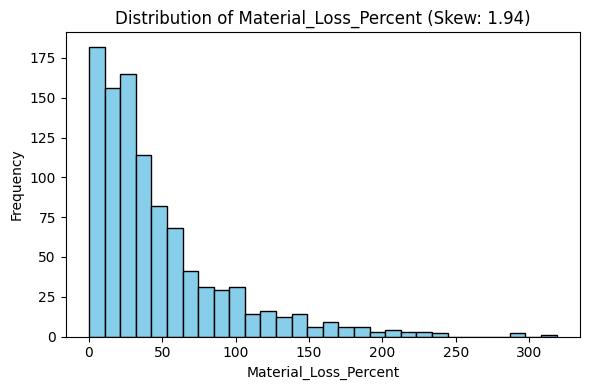

In [28]:
top_skewed = skewness[abs(skewness) > 1].index[:3]

for col in top_skewed:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col} (Skew: {sk(df[col]):.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

**Check for outline**

In [33]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Flag outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Count total outliers per column
outlier_count = outliers.sum().sort_values(ascending=False)
print(outlier_count)

Material_Loss_Percent       70
Thickness_mm                11
Max_Pressure_psi             0
Pipe_Size_mm                 0
Temperature_C                0
Corrosion_Impact_Percent     0
Thickness_Loss_mm            0
Time_Years                   0
dtype: int64


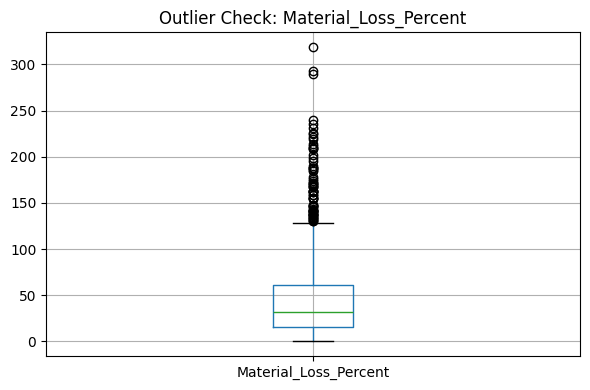

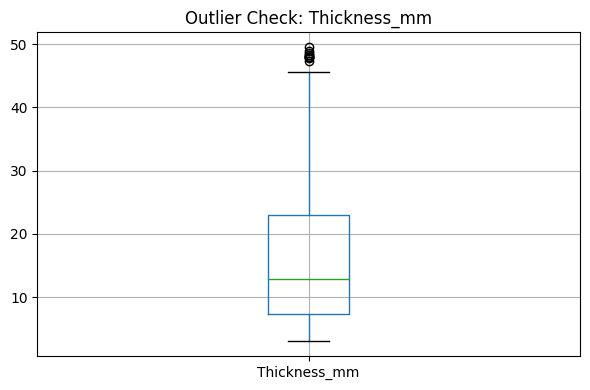

In [35]:
top_outlier_cols = outlier_count[outlier_count > 0].index[:3]

for col in top_outlier_cols:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f'Outlier Check: {col}')
    plt.tight_layout()
    plt.show()